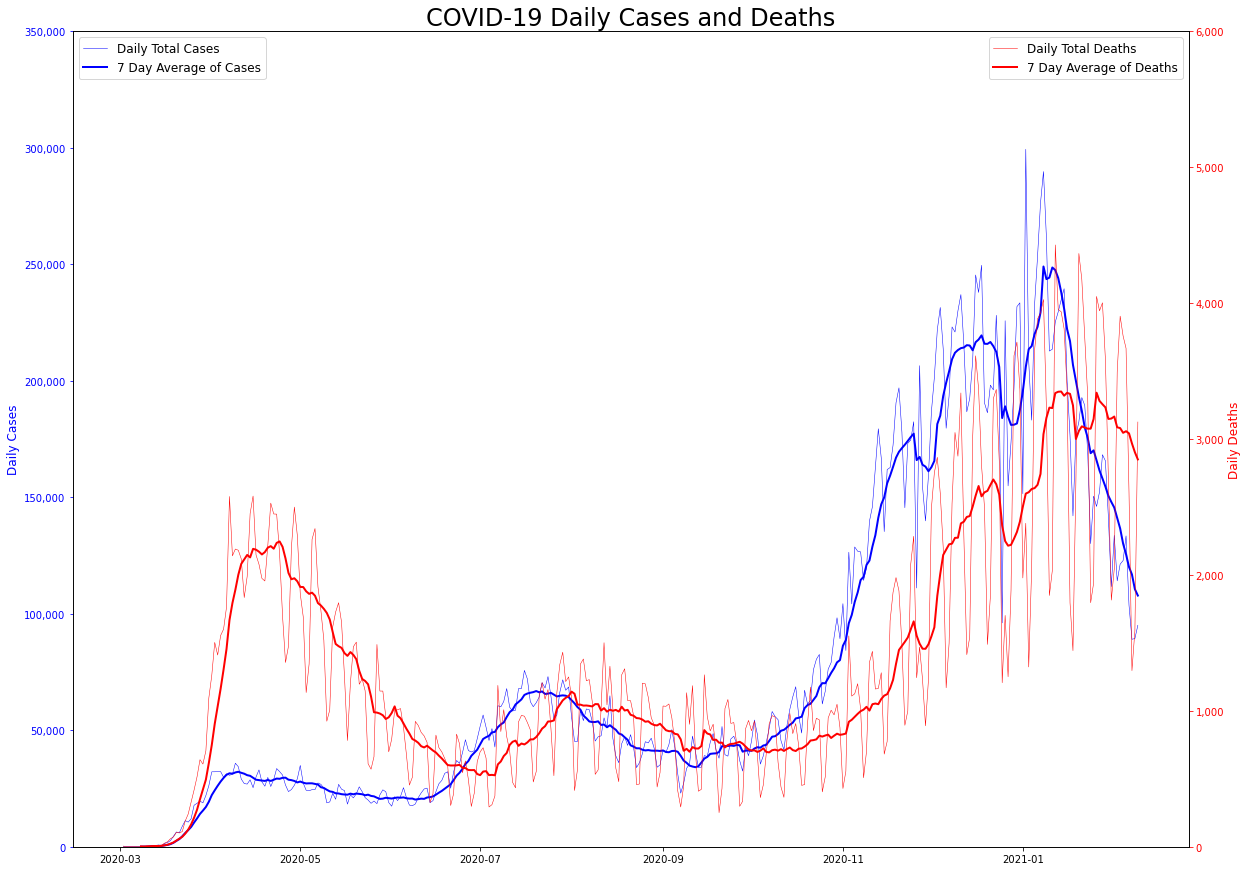

In [1]:
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#Create a folder if one doesn't already exist
dt = datetime.datetime.today()
folderName = 'C:\\Users\\Tim\\Google Drive\\COVID\\Graphs\\'
datestr = str(dt.year)
datestr = datestr + " "
if dt.month < 10:
    datestr = datestr + "0" + str(dt.month)
else:
    datestr = datestr + str(dt.month)
if dt.day < 10:
    datestr = datestr + " 0" + str(dt.day) 
else:
    datestr = datestr + " " + str(dt.day)
 
try:
    os.mkdir(folderName + datestr)  
except OSError as error:  
    print(error)

#Process data code
deaths_raw = pd.read_csv(r"C:\Users\Tim\Documents\GitHub\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_US.csv")
deaths_raw_DF = pd.DataFrame(deaths_raw)
deathsUS = deaths_raw_DF.loc[deaths_raw_DF['iso3'] == 'USA']
deathsUS = deathsUS.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1)
totaldeathsUS = pd.DataFrame(deathsUS.sum())
totaldeathsUS = totaldeathsUS.iloc[39:,:]
dailydeathsUS = totaldeathsUS.diff(axis=0)
dailydeathsUS['7DayAverage'] = dailydeathsUS.rolling(7).sum() / 7
dailydeathsUS.index = pd.to_datetime(dailydeathsUS.index)

cases_raw = pd.read_csv(r"C:\Users\Tim\Documents\GitHub\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_US.csv")
cases_raw_DF = pd.DataFrame(cases_raw)
casesUS = cases_raw_DF.loc[cases_raw_DF['iso3']=='USA']

casesUS = casesUS.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
totalcasesUS = pd.DataFrame(casesUS.sum())
totalcasesUS = totalcasesUS.iloc[39:,:]
dailycasesUS = totalcasesUS.diff(axis=0)
dailycasesUS['7DayAverage'] = dailycasesUS.rolling(7).sum() / 7
dailycasesUS.index = pd.to_datetime(dailycasesUS.index)

#Plot code
fig = plt.figure
fig, ax = plt.subplots(figsize = (20,15))
ax2=ax.twinx()

line1, = ax2.plot(dailydeathsUS.index, dailydeathsUS[0], label='Daily Total Deaths', color='r', linewidth = 0.5)
line2, = ax2.plot(dailydeathsUS.index, dailydeathsUS['7DayAverage'], label='7 Day Average of Deaths', color='r', linewidth = 2)
line3 = ax.plot(dailycasesUS.index, dailycasesUS[0], label = 'Daily Total Cases', color='b', linewidth = 0.5)
line4 = ax.plot(dailycasesUS.index, dailycasesUS['7DayAverage'], label = '7 Day Average of Cases', color = 'b', linewidth = 2)

ax.set_ylabel("Daily Cases", fontsize=12)
ax2.set_ylabel("Daily Deaths", fontsize=12)
plt.title("COVID-19 Daily Cases and Deaths", fontsize=24)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='y', colors='blue')
ax.set_ylim([0, 350000])
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
ax.legend(loc=2, prop={'size':12})
ax2.legend(loc=1, prop={'size':12})
ax2.set_ylim([0, 6000])
plt.show
plt.savefig(folderName + datestr + "\\" + datestr + ".png")